# Cheat sheet

#### Models
1. Linear Regression
2. Locally Weighted Linear Regression
3. Logistic Regression
4. Softmax Regression
5. Gaussian Discriminant Analysis/(Multinomial Naive Bayes)
6. Support Vector Machines

#### Learning Algorithms
1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. MiniBatch Gradient Descent
4. Newton's Method

#### Preprocessing
1. Standard Scaler
2. Min-Max Scaler
3. Polynomial Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Linear Regression

In [2]:
class LinearRegressionModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = X@theta
        return hypothesis
        
#2. cost function
    def cost(self, X, y, theta, average = False):
        #expects X to be a design matrix, y to be a column vector and theta to be a column vector
        if(average == False):
            J = 1/2*(self.h(X,theta)-y).T@(self.h(X,theta)-y)
        else:
            J = 1/(2*X.shape[0])*(self.h(X,theta)-y).T@(self.h(X,theta)-y)
        return J

#3. gradient function
    def gradient(self, X, y, theta, average = False):
        if(average == False):
            dJ = X.T@(self.h(X,theta)-y)
        else:
            dJ = X.T@(self.h(X,theta)-y)/(X.shape[0])
        return dJ
    
#4. batch gradient descent
    def batch_gd(self, X, y, initial_theta, max_iteration, alpha, tolerance = 0,average = False):
        cost = []
        gradient = []
        theta = initial_theta
        iteration = 0
        for n in range(max_iteration):
            cost.append(self.cost(X,y,theta,average))
            gradient.append(self.gradient(X,y,theta,average))
            theta = theta - alpha*gradient[-1]
            iteration_no = n+1
        cost = np.array(cost)
        gradient = np.array(gradient)
        return theta,cost,gradient,iteration_no
    
#5. normal equation
    def normal_equation(self, X, y):
        theta = np.linalg.inv(X.T@X)@X.T@y
        return theta
            
#5. predict
    def predict(self,X,theta):
        prediction = self.h(X,theta)
        return prediction
    
#6. score/error calculation
    def mean_squared_error(self,X,y,theta):
        mse = self.cost(X,y,theta,average = True)*2
        return mse
        
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(1,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)

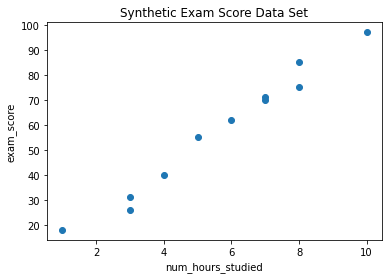

In [3]:
# Independent variable

num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])

# Dependent variable

exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Plot the data

plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

In [4]:
# Add dummy variable for intercept term to design matrix.
# Understand the numpy insert function by reading https://numpy.org/doc/stable/reference/generated/numpy.insert.html

X = np.array([num_hours_studied]).T
X = np.insert(X, 0, 1, axis=1)
y = exam_score
print(X.shape)
print(y.shape)

(11, 2)
(11,)


In [18]:
LR = LinearRegressionModel()

alpha = 0.001
max_iteration = 100000
initial_theta = np.zeros(2)

theta,cost,gradient,iteration = LR.batch_gd(X,y,initial_theta,max_iteration,alpha,average = True)

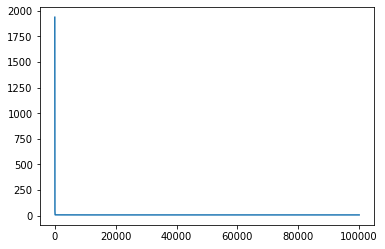

In [19]:
LR.plot_cost(cost,iteration)

In [21]:
theta2 = LR.normal_equation(X,y)
print(theta)
print(LR.mean_squared_error(X,y,theta))
print(theta2)
print(LR.mean_squared_error(X,y,theta2))

[4.27819535 9.40225566]
12.271701982228306
[4.27819549 9.40225564]
12.271701982228299


In [22]:
x_series = np.linspace(0,10,100)
print(x_series.shape)
x_series = np.insert(x_series[:,np.newaxis],0,1, axis=1)
print(x_series.shape)
y_pred = LR.predict(x_series, theta)
y_pred2 = LR.predict(x_series,theta2)

(100,)
(100, 2)


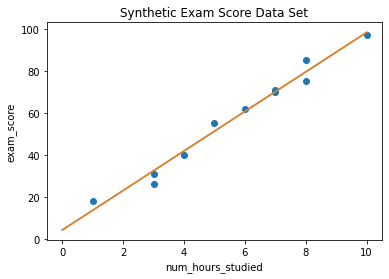

In [23]:
plt.scatter(num_hours_studied, exam_score)
plt.plot(x_series[:,1],y_pred)
plt.plot(x_series[:,1],y_pred2)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

## 2. Locally Weighted Linear Regression

In [ ]:
class LWLRModel:
#1. hypothesis function
    def h(self, X, theta):      
        hypothesis = X@theta
        return hypothesis
    
#2. Weights
    def w(self,X,x,tau):
        w = np.exp(-(X-x).T@(X-x)/(2*tau**2))
    
#5. normal equation
    def normal_equation(self, X, y):
        theta = np.linalg.inv(X.T@X)@X.T@y
        return theta
            
#5. predict
    def predict(self,X,theta):
        prediction = self.h(X,theta)
        return prediction
    
#6. score/error calculation
    def mean_squared_error(self,X,y,theta):
        mse = self.cost(X,y,theta,average = True)*2
        return mse
        
#7. plotting cost
    def plot_cost(self,cost, iteration_no):
        iteration_series = np.arange(1,iteration_no+1)
        ax = plt.axes()
        ax.plot(iteration_series, cost)